## [미니프로젝트] 악성사이트 탐지 머신러닝 모델 개발

## <b>[2단계] 데이터 분석 및 전처리

## ▣ 데이터 소개 - 분류!!!!!!
* 학습 데이터셋 : train.csv
<br>

## ▣ 학습 데이터셋의 변수 소개

* url_len : URL 길이
* url_num_hypens_dom : URL내 '-'(하이픈) 개수
* url_path_len : URL의 경로 길이
* url_domain_len : URL의 도메인 길이
* url_host_name : URL의 hostname 길이
* url_num_dots : URL내 '.'(닷) 개수
* url_num_underscores : URL내 '_'(언더바) 개수
* url_query_len : URL쿼리 길이
* url_num_query_para : URL쿼리의 파라미터 개수
* url_ip_present : URL내 IP표시 여부
* url_entropy : URL 복잡도
* url_chinese_present : URL내 중국어 표기 여부
* url_port : URL내 포트 표기 여부
* html_num_tags('iframe') : HTML내 'iframe' 태그 개수
* html_num_tags('script') : HTML내 'script' 태그 개수
* html_num_tags('embed') : HTML내 'embed' 태그 개수
* html_num_tags('object') : HTML내 'object' 태그 개수
* html_num_tags('div') : HTML내 'div' 태그 개수
* html_num_tags('head') : HTML내 'head' 태그 개수
* html_num_tags('body') : HTML내 'body' 태그 개수
* html_num_tags('form') : HTML내 'form' 태그 개수
* html_num_tags('a') : HTML내 'a' 태그 개수
* html_num_tags('applet') : HTML내 'applet' 태그 개수
* **label : 악성사이트 여부 컬럼 ( 'malicious'는 악성사이트, 'benign'은 정상사이트 ) target!!**

<br>

---

### **[프로세스]**
0. 라이브러리 import 및 데이터 불러오기
1. 데이터 분석하기
2. 데이터 전처리하기


---

# <b>Step 0. 라이브러리 import 및 데이터 불러오기
### **가. 라이브러리 import**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### **나.  학습데이터 불러오기**

In [54]:
df = pd.read_csv("train.csv", sep = ",")

# <b>Step 1. 데이터 분석하기
---

단변량 분석은 데이터분석의 매우 기초적인 분석기법으로, 독립적인 개별 변수가 가지고있는 특성들을 이해하는 과정입니다.

## <b>Q1. 데이터 단변량 분석하기

<span style="color: green"> 개별 변수에 대해 아래 사항들을 분석해보세요. </span>

1. 변수가 내포하고 있는 의미
2. 변수가 수치형인지, 범주형인지
3. 결측치 존재 여부 및 조치 방안
4. 기초 통계량 확인
5. 데이터 분포 확인
6. 위 정보로부터 파악한 내용 정리
7. 추가 분석사항 도출

In [29]:
df

,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,...,html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('applet'),label
0,23.0,0.0,8.0,15.0,15.0,2.0,0.0,0.0,0.0,0.0,...,7.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,malicious
1,75.0,0.0,58.0,17.0,17.0,6.0,0.0,0.0,0.0,0.0,...,18.0,0.0,0.0,20.0,1.0,1.0,0.0,21.0,0.0,benign
2,20.0,0.0,4.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,...,33.0,0.0,0.0,101.0,1.0,1.0,3.0,70.0,0.0,benign
3,27.0,0.0,13.0,14.0,14.0,3.0,0.0,0.0,0.0,0.0,...,15.0,0.0,0.0,151.0,1.0,1.0,1.0,55.0,0.0,benign
4,39.0,2.0,12.0,27.0,27.0,2.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,332.0,1.0,1.0,0.0,321.0,0.0,benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3659,68.0,3.0,16.0,52.0,52.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,11.0,1.0,1.0,0.0,3.0,0.0,malicious
3660,66.0,0.0,48.0,18.0,18.0,2.0,0.0,0.0,0.0,0.0,...,14.0,0.0,0.0,212.0,1.0,1.0,3.0,475.0,0.0,benign
3661,90.0,1.0,64.0,26.0,26.0,4.0,0.0,0.0,0.0,0.0,...,13.0,0.0,0.0,75.0,1.0,1.0,2.0,103.0,0.0,malicious
3662,46.0,0.0,33.0,13.0,13.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,1.0,1.0,0.0,3.0,0.0,benign


In [31]:
df["url_num_hyphens_dom"].describe()

count    3309.000000
mean        0.433061
std         0.855034
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max        14.000000
Name: url_num_hyphens_dom, dtype: float64

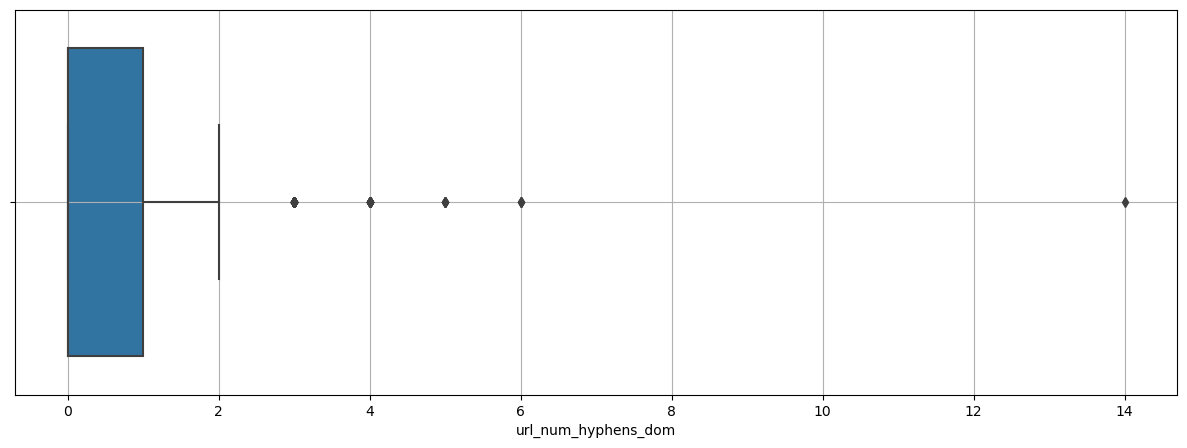

In [55]:
plt.figure(figsize = (15, 5))
sns.boxplot(x = df["url_num_hyphens_dom"])
plt.grid()
plt.show()

In [56]:
q1=df["url_num_hyphens_dom"].quantile(0.25)
q3=df["url_num_hyphens_dom"].quantile(0.75)
iqr = q3 - q1

iqr_b = df['url_num_hyphens_dom'] > q3 + 1.5 * iqr
tmp_b = df[iqr_b].index

iqr_s = df['url_num_hyphens_dom'] < q1 - 1.5 * iqr
tmp_s = df[iqr_s].index

df.drop(tmp_b, inplace = True)
df.drop(tmp_s, inplace = True)

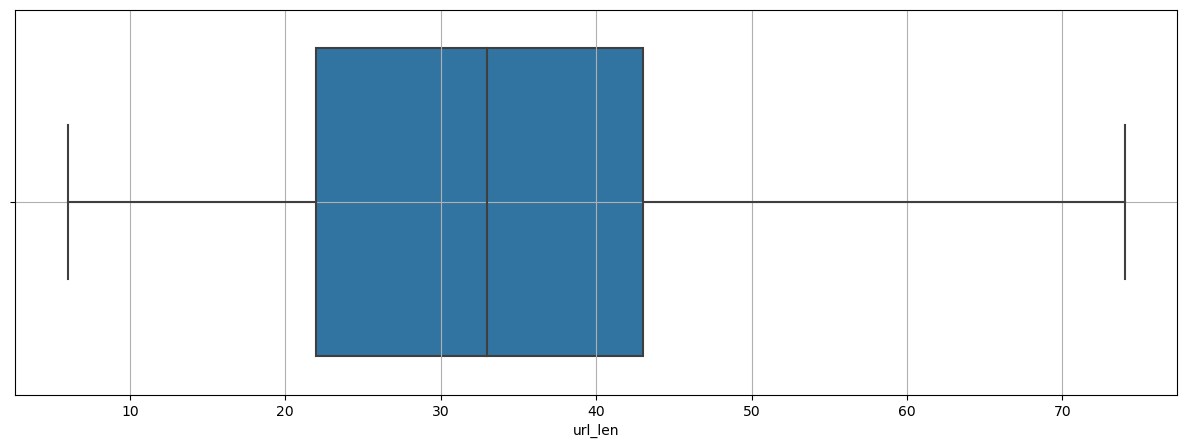

In [43]:
# plt.figure(figsize = (15, 5))
# sns.boxplot(x = df["url_len"])
# plt.grid()
# plt.show()

In [42]:
# q1 = df["url_len"].quantile(0.25)
# q3 = df["url_len"].quantile(0.75)
# iqr = q3 - q1

# iqr_c = df['url_len'] > q3 + 1.5 * iqr
# tmp = df[iqr_c].index
# df.drop(tmp, inplace = True)

In [45]:
df

,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,...,html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('applet'),label
0,23.0,0.0,8.0,15.0,15.0,2.0,0.0,0.0,0.0,0.0,...,7.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,malicious
2,20.0,0.0,4.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,...,33.0,0.0,0.0,101.0,1.0,1.0,3.0,70.0,0.0,benign
3,27.0,0.0,13.0,14.0,14.0,3.0,0.0,0.0,0.0,0.0,...,15.0,0.0,0.0,151.0,1.0,1.0,1.0,55.0,0.0,benign
4,39.0,2.0,12.0,27.0,27.0,2.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,332.0,1.0,1.0,0.0,321.0,0.0,benign
5,18.0,0.0,0.0,18.0,18.0,2.0,0.0,0.0,0.0,0.0,...,4.0,1.0,1.0,3.0,1.0,1.0,0.0,18.0,0.0,benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3658,14.0,0.0,0.0,14.0,14.0,3.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,1.0,1.0,0.0,1.0,0.0,benign
3659,68.0,3.0,16.0,52.0,52.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,11.0,1.0,1.0,0.0,3.0,0.0,malicious
3660,66.0,0.0,48.0,18.0,18.0,2.0,0.0,0.0,0.0,0.0,...,14.0,0.0,0.0,212.0,1.0,1.0,3.0,475.0,0.0,benign
3662,46.0,0.0,33.0,13.0,13.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,1.0,1.0,0.0,3.0,0.0,benign


## <b>Q2. 데이터 이변량 분석하기

* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.
* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 적절한 유의수준
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.

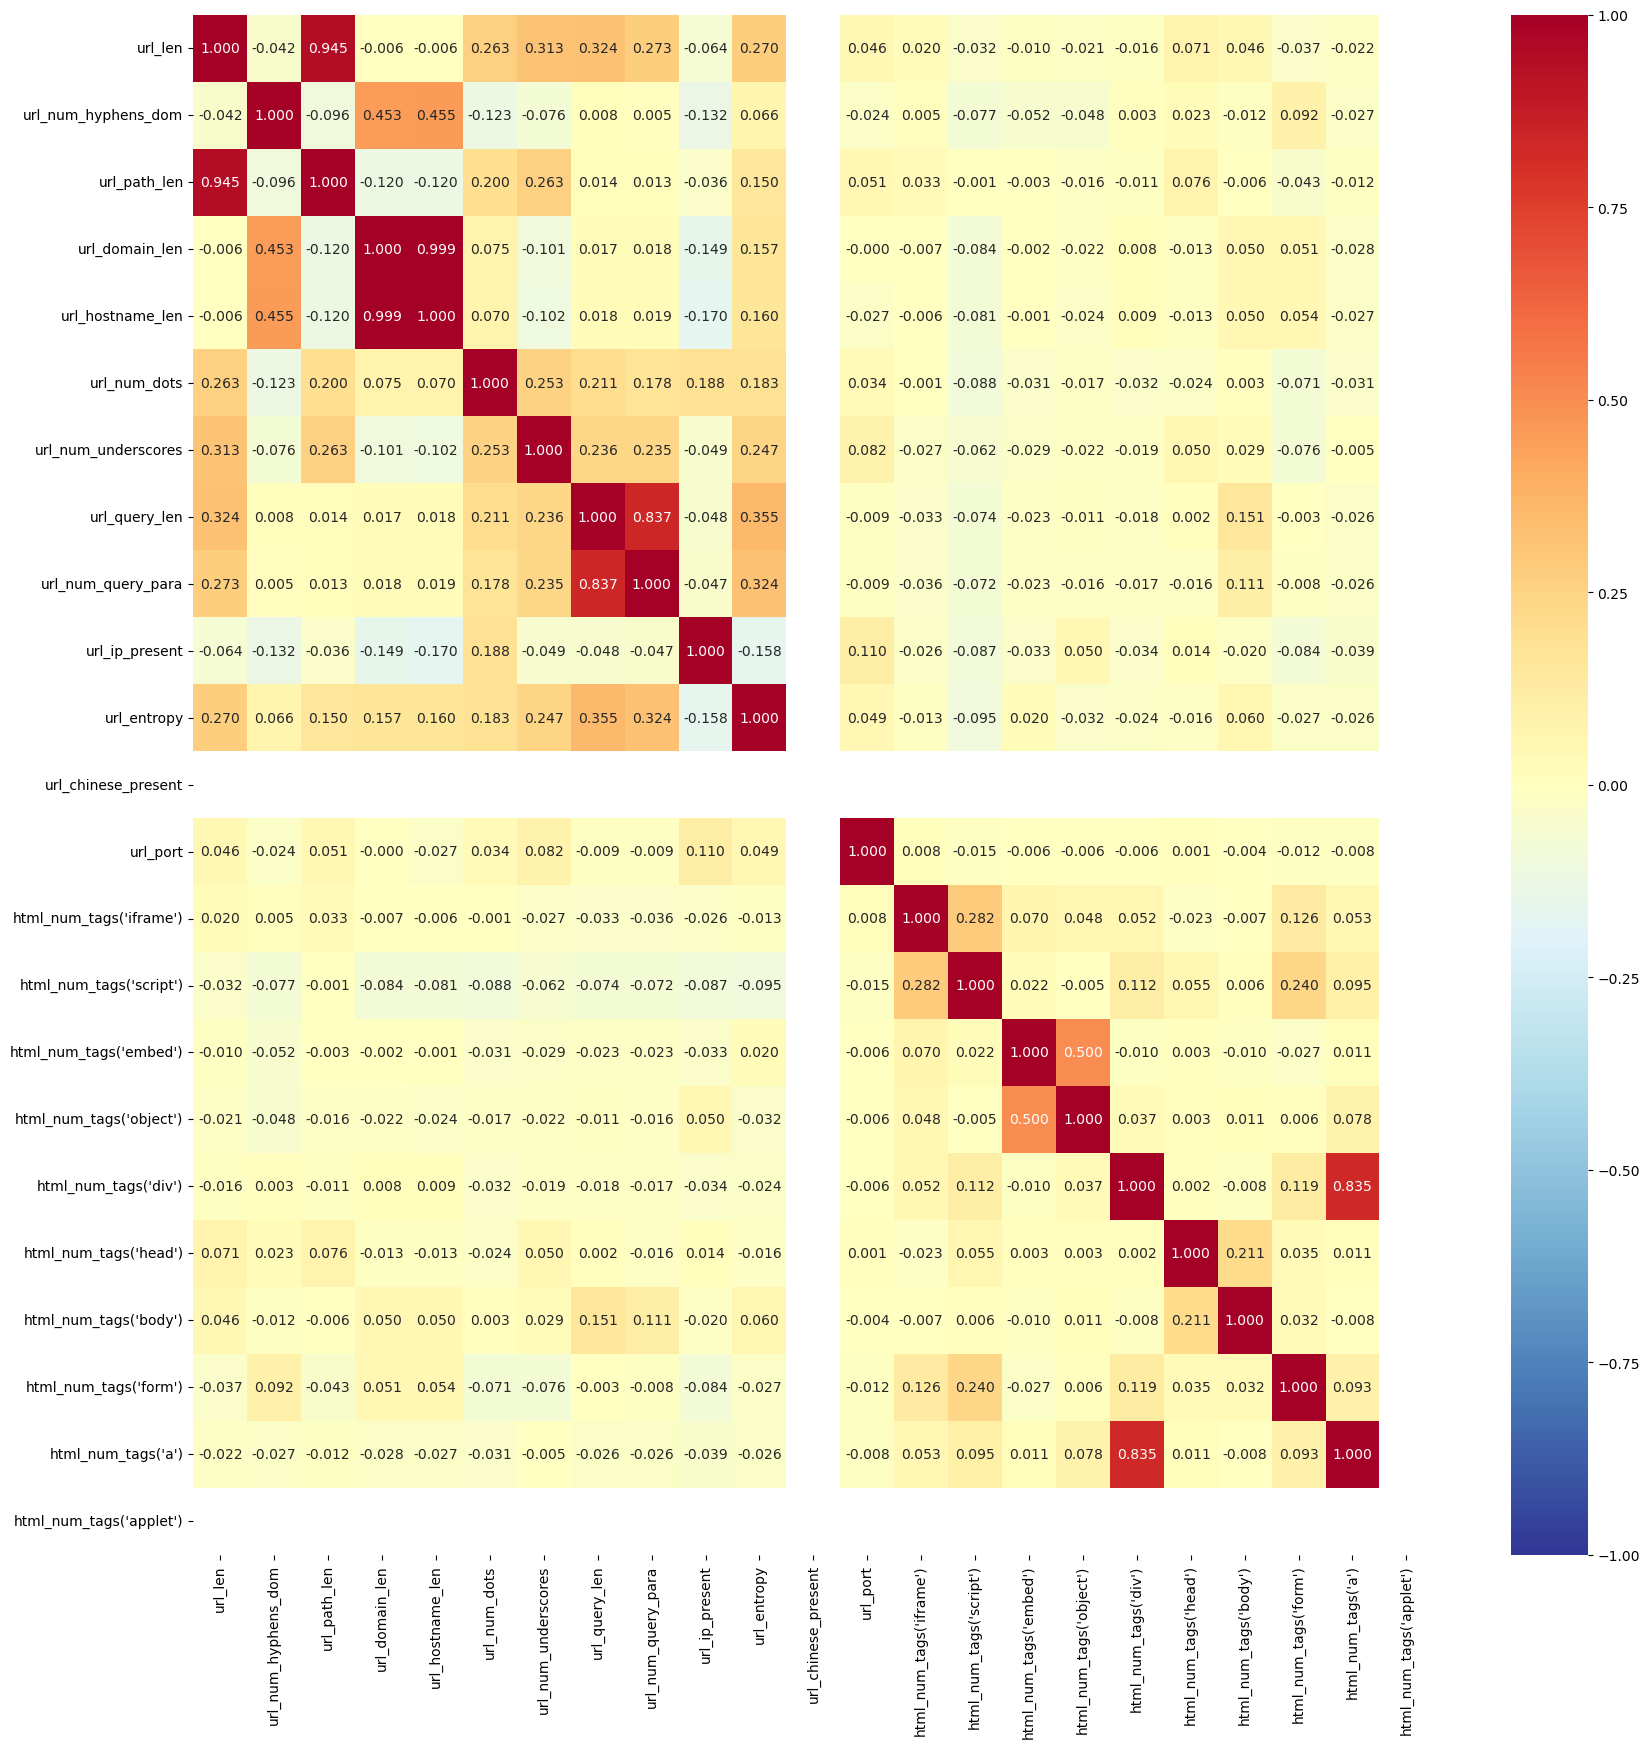

In [57]:
plt.figure(figsize = (20, 20))
sns.heatmap(df.corr(), 
            annot = True,            # 숫자(상관계수) 표기 여부
            fmt = '.3f',             # 숫자 포멧 : 소수점 3자리까지 표기
            cmap = 'RdYlBu_r',       # 칼라맵
            vmin = -1, vmax = 1)     # 값의 최소, 최대값값
plt.show()

# <b>Step 2. 데이터 전처리
---

## <b>Q3. 중복 데이터 제거
### 우리가 접속하는 대부분의 웹사이트는 정상 사이트입니다.
### 또한, 특정 몇 개 사이트(ex. google, instagram, facebook 등)에 접속 빈도가 높습니다.
### 편중된 데이터는 모델 학습에 안 좋은 영향을 주기 때문에 중복 데이터 제거를 통해 해결합니다.
### 이 과정은 데이터 전처리 시 반드시 해야 하는 과정은 아니며, 프로젝트/데이터 성격에 맞게 결정하시면 됩니다.

### <span style="color:darkred">[문제1] df info()를 통해 데이터를 확인하고 중복된 데이터는 삭제해주세요. 삭제 후 info()를 통해 이전 데이터와 비교해 보세요.<span>

In [47]:
# 데이터 프레임의 info를 확인합니다.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3068 entries, 0 to 3663
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   url_len                  3068 non-null   float64
 1   url_num_hyphens_dom      3068 non-null   float64
 2   url_path_len             3067 non-null   float64
 3   url_domain_len           3067 non-null   float64
 4   url_hostname_len         3068 non-null   float64
 5   url_num_dots             3068 non-null   float64
 6   url_num_underscores      3068 non-null   float64
 7   url_query_len            3068 non-null   float64
 8   url_num_query_para       3068 non-null   float64
 9   url_ip_present           3068 non-null   float64
 10  url_entropy              3068 non-null   float64
 11  url_chinese_present      3068 non-null   float64
 12  url_port                 3068 non-null   float64
 13  html_num_tags('iframe')  3068 non-null   float64
 14  html_num_tags('script') 

In [120]:
df["html_num_tags('script')"].value_counts()

2.0      646
0.0      486
1.0      355
3.0      232
9.0      184
        ... 
267.0      1
97.0       1
83.0       1
74.0       1
63.0       1
Name: html_num_tags('script'), Length: 78, dtype: int64

In [127]:
df["html_num_tags('form')"].value_counts()

1.0     1790
0.0     1191
2.0      433
3.0      132
4.0       49
5.0       40
7.0       12
19.0       5
8.0        4
6.0        4
9.0        1
57.0       1
11.0       1
10.0       1
Name: html_num_tags('form'), dtype: int64

In [128]:
df["html_num_tags('a')"].value_counts()

0.0       672
3.0       214
16.0      208
1.0       186
15.0      118
         ... 
2557.0      1
97.0        1
510.0       1
427.0       1
136.0       1
Name: html_num_tags('a'), Length: 300, dtype: int64

In [126]:
df["html_num_tags('body')"].value_counts()

1.0    3495
2.0     106
0.0      57
3.0       6
Name: html_num_tags('body'), dtype: int64

In [122]:
df["html_num_tags('object')"].value_counts()

0.0    3579
1.0      76
2.0       5
3.0       1
8.0       1
4.0       1
5.0       1
Name: html_num_tags('object'), dtype: int64

In [123]:
df["html_num_tags('div')"].value_counts()

0.0      328
41.0     322
4.0      148
1.0      144
2.0      136
        ... 
333.0      1
132.0      1
325.0      1
93.0       1
282.0      1
Name: html_num_tags('div'), Length: 302, dtype: int64

In [124]:
df["html_num_tags('head')"].value_counts()

1.0    3590
0.0      41
2.0      32
3.0       1
Name: html_num_tags('head'), dtype: int64

In [121]:
df["html_num_tags('embed')"].value_counts()

0.0    3602
1.0      60
3.0       2
Name: html_num_tags('embed'), dtype: int64

In [119]:
df["html_num_tags('iframe')"].value_counts()

0.0     3172
1.0      365
2.0       59
3.0       41
4.0        8
5.0        6
8.0        3
12.0       2
6.0        2
10.0       2
11.0       1
26.0       1
17.0       1
7.0        1
Name: html_num_tags('iframe'), dtype: int64

In [107]:
df["url_len"].value_counts()

17.0     147
34.0     117
39.0     101
18.0      97
37.0      91
        ... 
324.0      1
214.0      1
100.0      1
138.0      1
156.0      1
Name: url_len, Length: 242, dtype: int64

In [108]:
df["url_num_hyphens_dom"].value_counts()

0.0     2734
1.0      509
2.0      315
3.0       71
4.0       26
5.0        5
6.0        3
14.0       1
Name: url_num_hyphens_dom, dtype: int64

In [109]:
df["url_path_len"].value_counts()

0.0       627
1.0       470
10.0      306
13.0      129
17.0      129
         ... 
1690.0      1
270.0       1
131.0       1
139.0       1
163.0       1
Name: url_path_len, Length: 203, dtype: int64

In [110]:
df["url_domain_len"].value_counts()

17.0     485
13.0     267
14.0     252
15.0     213
16.0     213
        ... 
0.0        1
55.0       1
72.0       1
4.0        1
103.0      1
Name: url_domain_len, Length: 68, dtype: int64

In [111]:
df["url_hostname_len"].value_counts()

17.0     461
13.0     284
14.0     270
15.0     219
16.0     198
        ... 
109.0      1
55.0       1
72.0       1
68.0       1
103.0      1
Name: url_hostname_len, Length: 67, dtype: int64

In [112]:
df["url_num_dots"].value_counts()

2.0     1505
3.0      952
1.0      662
4.0      383
5.0       53
6.0       50
8.0       15
7.0       13
9.0       10
11.0       5
13.0       5
10.0       5
26.0       2
32.0       1
12.0       1
14.0       1
16.0       1
Name: url_num_dots, dtype: int64

In [113]:
df["url_num_underscores"].value_counts()

0.0     3206
1.0      257
2.0       87
3.0       57
4.0       29
6.0        7
14.0       6
5.0        5
12.0       4
10.0       2
18.0       2
11.0       1
15.0       1
Name: url_num_underscores, dtype: int64

In [114]:
df["url_query_len"].value_counts()

0.0      3436
41.0       50
157.0      21
5.0        12
11.0        8
         ... 
271.0       1
312.0       1
42.0        1
71.0        1
43.0        1
Name: url_query_len, Length: 78, dtype: int64

In [115]:
df["url_num_query_para"].value_counts()

0.0    3471
1.0     105
2.0      41
3.0      33
6.0       5
7.0       4
9.0       2
8.0       2
4.0       1
Name: url_num_query_para, dtype: int64

In [116]:
df["url_ip_present"].value_counts()

0.0    3441
1.0     223
Name: url_ip_present, dtype: int64

In [118]:
df["url_port"].value_counts()

0.0    3656
1.0       8
Name: url_port, dtype: int64

In [58]:
# 중복 데이터 제거를 제거합니다.
df.drop(["url_ip_present", "url_port"], axis = 1, inplace = True)

In [132]:
# 데이터 프레임의 info를 확인합니다.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3664 entries, 0 to 3663
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   url_len                  3664 non-null   float64
 1   url_num_hyphens_dom      3664 non-null   float64
 2   url_path_len             3664 non-null   float64
 3   url_domain_len           3664 non-null   float64
 4   url_hostname_len         3664 non-null   float64
 5   url_num_dots             3664 non-null   float64
 6   url_num_underscores      3664 non-null   float64
 7   url_query_len            3664 non-null   float64
 8   url_num_query_para       3664 non-null   float64
 9   url_entropy              3664 non-null   float64
 10  html_num_tags('iframe')  3664 non-null   float64
 11  html_num_tags('script')  3664 non-null   float64
 12  html_num_tags('embed')   3664 non-null   float64
 13  html_num_tags('object')  3664 non-null   float64
 14  html_num_tags('div')    

---

## <b>Q4. 텍스트와 범주형 특성 처리

### 기계가 데이터를 인식할 수 있도록 텍스트 데이터를 수치형 데이터로 변경합니다.
 - replace() 함수를 이용한 텍스트와 범주형 특성 처리

**<span style="color:green">[참고링크] 공식 Document**</span>

* [replace](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html)
* [unique](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.unique.html)

In [137]:
df["label"].value_counts()

0    1858
1    1806
Name: label, dtype: int64

In [59]:
df.replace('benign', 0, inplace = True)
df.replace('malicious', 1, inplace = True)

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3664 entries, 0 to 3663
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   url_len                  3664 non-null   float64
 1   url_num_hyphens_dom      3664 non-null   float64
 2   url_path_len             3664 non-null   float64
 3   url_domain_len           3664 non-null   float64
 4   url_hostname_len         3664 non-null   float64
 5   url_num_dots             3664 non-null   float64
 6   url_num_underscores      3664 non-null   float64
 7   url_query_len            3664 non-null   float64
 8   url_num_query_para       3664 non-null   float64
 9   url_entropy              3664 non-null   float64
 10  html_num_tags('iframe')  3664 non-null   float64
 11  html_num_tags('script')  3664 non-null   float64
 12  html_num_tags('embed')   3664 non-null   float64
 13  html_num_tags('object')  3664 non-null   float64
 14  html_num_tags('div')    

### <span style="color:darkred">[문제2] series.copy()를 이용하여 'label' column의 데이터를 'label_binary' column으로 복사해보세요.<span>

In [ ]:
# series.copy() 로 복사하여 새로운 컬럼을 생성합니다.

### <span style="color:darkred">[문제3] replace() 함수를 활용하여 'label_binary'의 'benign'은 0으로 'malicious'은 1로 변경해주세요. <br><br> 'label'과 데이터를 비교해 보세요.<span>

In [3]:
# replace() 함수를 사용 텍스트 데이터를 수치형 데이터로 변경합니다.


In [9]:
# 텍스트 데이터를 수치형 데이터로 후 unique() 함수를 통해 유일한 값 확인


---

## <b>Q5. 결측치 처리

### 데이터 수집 과정에서 발생한 오류 등으로 인해 결측치가 포함된 경우가 많습니다.
### 모델링 전에 결측치를 확인하고 이를 정제하는 과정은 필요합니다.

### <span style="color:darkred">[문제4] 결측치의 존재를 확인하고 결측치가 포함된 데이터를 처리해보세요.<span>

In [60]:
df["url_path_len"].fillna(0, inplace = True)
df["url_domain_len"].fillna(0, inplace = True)

In [50]:
# 결축치의 존재를 확인합니다.
df.isnull().sum()

url_len                    0
url_num_hyphens_dom        0
url_path_len               0
url_domain_len             0
url_hostname_len           0
url_num_dots               0
url_num_underscores        0
url_query_len              0
url_num_query_para         0
url_ip_present             0
url_entropy                0
url_chinese_present        0
url_port                   0
html_num_tags('iframe')    0
html_num_tags('script')    0
html_num_tags('embed')     0
html_num_tags('object')    0
html_num_tags('div')       0
html_num_tags('head')      0
html_num_tags('body')      0
html_num_tags('form')      0
html_num_tags('a')         0
html_num_tags('applet')    0
label                      0
dtype: int64

---

## <b>Q6. 데이터 탐색을 통해 새로운 변수 추가 혹은 불필요한 변수 제거

### AI모델의 성능 향상을 위해 기존의 변수를 조합해 새로운 변수를 만들어 내기도 하고
### 데이터 분석을 통해 필요없는 변수는 삭제하는 과정이 필요 합니다.

### <span style="color:darkred">[문제5] 상관관계 함수 및 데이터 시각화 등을 활용하며 데이터셋을 분석하고 컬럼을 추가/삭제 해보세요.<span>

In [61]:
df.drop(["html_num_tags('applet')", "url_chinese_present"], axis = 1, inplace = True)

---

## <b>Q7. train_test_split을 이용하여, train_x, test_x, train_y, test_y로 데이터 분리

### 모델을 학습하는 데에는 Train 데이터만 사용해야 합니다.
### 학습에 사용하지 않은 데이터를 통해 모델을 평가해야 합니다.
### 그러기 위해 Train / Test 데이터로 분리합니다.


**<span style="color:green">[참고링크] 공식 Document**</span>

* train_test_split(https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

### <span style="color:darkred">[문제6] train_test_split 함수를 사용하여 train 데이터와 test 데이터를 분리하고 각각의 shape를 확인하세요<span>

In [62]:
x = df.drop("label", axis = 1)
y = df.loc[:, "label"]

In [63]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [64]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((2846, 19), (2846,), (712, 19), (712,))

In [65]:
df.to_csv("df_train.csv", index = False)